# 1.Titanic

## 1-1. 문제 정의 및 가설 수립
* 나이가 어릴수록 생존률이 높을 것이다.
* 여자의 생존률이 남자보다 높을 것이다.
* 높은 객실등급에 탄 사람들이 낮은 객실등급보다 생존률이 높을 것이다.

## 1-2. 데이터 가져오기
* kaggle 사이트 : https://www.kaggle.com/
* 공공데이터 포털 : https://www.data.go.kr/
* 서울 열린 데이터 광장 : https://data.seoul.go.kr/
* 통계청 : https://kosis.kr/
* 기상청 : https://data.kma.go.kr/

In [2]:
#!kaggle competitions download -c titanic

In [3]:
#!tar -xvf titanic.zip

## 1-3. 데이터 로드하기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv') # 객실등급 데이터 가지고 오기
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 한글 컬럼명으로 바꾸기
df.columns = ['id', '생존여부', '객실등급', '이름', '성별', '나이', '형제 배우자수', '부모자식수','티켓번호', '요금', '수화물 번호', '선착장']
df

,id,생존여부,객실등급,이름,성별,나이,형제 배우자수,부모자식수,티켓번호,요금,수화물 번호,선착장
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1-4. 데이터 살펴보기

In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       891 non-null    int64  
 1   생존여부     891 non-null    int64  
 2   객실등급     891 non-null    int64  
 3   이름       891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   형제 배우자수  891 non-null    int64  
 7   부모자식수    891 non-null    int64  
 8   티켓번호     891 non-null    object 
 9   요금       891 non-null    float64
 10  수화물 번호   204 non-null    object 
 11  선착장      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,id,생존여부,객실등급,나이,형제 배우자수,부모자식수,요금
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

id           0
생존여부         0
객실등급         0
이름           0
성별           0
나이         177
형제 배우자수      0
부모자식수        0
티켓번호         0
요금           0
수화물 번호     687
선착장          2
dtype: int64

In [11]:
# 객실등급(1~3등급)
df.객실등급.value_counts()

3    491
1    216
2    184
Name: 객실등급, dtype: int64

In [12]:
# 선착장
df.선착장.value_counts()

S    644
C    168
Q     77
Name: 선착장, dtype: int64

In [18]:
# 불필요한 컬럼 삭제
# id, 이름, 티켓번호, 수화물번호
df.drop(['id','이름','티켓번호','수화물 번호'], axis=1, inplace=True)
df.head()

,생존여부,객실등급,성별,나이,형제 배우자수,부모자식수,요금,선착장
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 1-5. EDA (탐색적 데이터분석)

In [19]:
df.생존여부.value_counts()

0    549
1    342
Name: 생존여부, dtype: int64

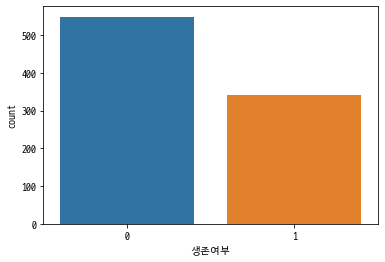

In [22]:
sns.countplot(x='생존여부', data=df)
plt.show()

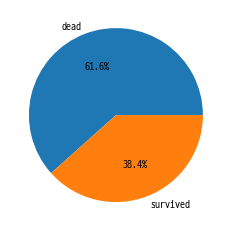

In [28]:
plt.pie(df.생존여부.value_counts(),labels=['dead', 'survived'], autopct="%.1f%%")
plt.show()

## 2. 나이별 데이터 분석

In [29]:
df['나이'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: 나이, dtype: float64

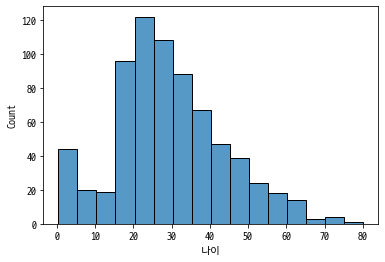

In [33]:
#나이대별 분포도
sns.histplot(df.나이, bins=16)
plt.show()

In [34]:
df.loc[df.나이 < 10, '생존여부'].count()

62

In [38]:
df.loc[df.나이 < 10, '생존여부'].mean()

0.6129032258064516

In [36]:
38/62 * 100

61.29032258064516

In [40]:
survival_rate = []
for i in range(10, 91, 10): #10~90
    survival_rate.append(df.loc[(df.나이 >= i-10) & (df.나이 < i), '생존여부'].mean())
survival_rate

[0.6129032258064516,
 0.4019607843137255,
 0.35,
 0.437125748502994,
 0.38202247191011235,
 0.4166666666666667,
 0.3157894736842105,
 0.0,
 1.0]

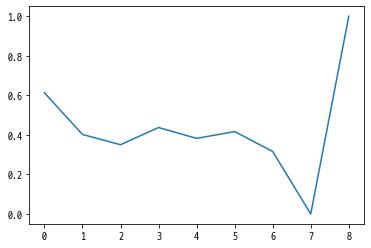

In [44]:
sns.lineplot(data=survival_rate)
plt.show()

나이대별 데이터 분석을 한 결과 나이가 어릴수록 생존율이 높다는 가설은 맞다고 보기는 어렵다.

## 3. 성별 데이터 분석

In [49]:
df.groupby('성별')['생존여부'].count().to_frame()

,생존여부
성별,
female,314
male,577


In [50]:
df.groupby('성별')['생존여부'].sum().to_frame()

,생존여부
성별,
female,233
male,109


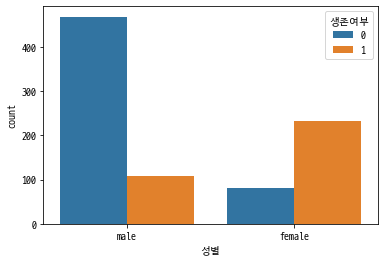

In [51]:
sns.countplot(x='성별',hue='생존여부', data=df)
plt.show()